# Elo Rating System
Having done some reading around the Elo rating system, which is most commonly associated with chess, I wanted to take it and apply it to pool games that I play with my friends; it seems appropriate given the win/loss nature of the matches and would be a nice contrast to the other methods that I have implemented in the past.  

It seems that the score at the time of the match is taken into consideration, and a share of the available points (defined by `k`) are shared depending on the difference between the achieved score and the expected score (given the differences in the ratings of the two players). 

Each player will start at a given level, and the system is set up as such that a player rated 400 points below there opponent is 10 times less likely to win the match. 

There appears to be two variations in the score. You can have your 'live' score, and then a rating that is set at the beginning of a given period. For FIDE, this is every month. Every game that you play during that period is calculated using the score at the beginning of the period, and only 'truly' updated when the period ends. You can work out a 'live' score, but this uses the rating from the start of the period and doesn't propogate through i.e. if I play someone who is 1200 at the beginning of the period, but they have already won a single game, then the calculations for my rating change will use 1200 and not the 'live' score that will be greater than that. 

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

The amount that the score moves is based entirely on the expected result, and how the actual result compares to that, we need to calculate the expected result to be able to calculate the movement of the ratings after each game.

In [246]:
def expected_score(player1_rating, player2_rating):
    """
    Given two player ratings, define the expected score that player 1 will defeat player 2
    
    Parameters
    ----------
    player1_rating: numeric 
        The rating of the first player
    player2_rating: numeric 
        The rating of the second player
        
    Returns
    -------
    numeric 
        The expected score that player 1 will defeat player 2
    """
    rating_difference = player2_rating - player1_rating
    return 1 / (1 + np.power(10, rating_difference / 400))

In [201]:
player1_rating, player2_rating = (2300, 2450)
expected_score(player1_rating, player2_rating)

0.29661499652817136

In [202]:
expected_score(player2_rating, player1_rating)

0.7033850034718286

In [237]:
def elo_delta(player1_rating, player2_rating, k=32):
    """
    Given two player ratings, the score difference for player 1 victory 
    """
    player1_exp_score = expected_score(player1_rating, player2_rating)
    player2_exp_score = expected_score(player2_rating, player1_rating)
    return round(k * (1 - player1_exp_score), 1)

In [239]:
player1_rating, player2_rating = (1300, 1100)
print(f'Player 1 ({player1_rating}) vs Player 2 ({player2_rating})')
print(f'Player 1: +{elo_delta(player1_rating, player2_rating)} / -{elo_delta(player2_rating, player1_rating)}')
print(f'Player 2: +{elo_delta(player2_rating, player1_rating)} / -{elo_delta(player1_rating, player2_rating)}')

Player 1 (1300) vs Player 2 (1100)
Player 1: +7.7 / -24.3
Player 2: +24.3 / -7.7


In [240]:
def determine_elo_rating_change(player1_rating, player1_score, player2_rating, player2_score, k=32):
    """
    Calculate the change in rating given players' ratings and scores
    """
    player1_exp_score = expected_score(player1_rating, player2_rating)
    player2_exp_score = expected_score(player2_rating, player1_rating)
    print((player1_exp_score, player2_exp_score))
    player1_new_rating = round(player1_rating + k * (player1_score - player1_exp_score), 1)
    player2_new_rating = round(player2_rating + k * (player2_score - player2_exp_score), 1)
    return (player1_new_rating, player2_new_rating)

In [241]:
determine_elo_rating_change(2500, 1, 2300, 0)

(0.7597469266479578, 0.2402530733520421)


(2507.7, 2292.3)

In [39]:
x = np.linspace(logistic.ppf(0.01), logistic.ppf(0.99), 100)

In [37]:
logistic.ppf(0.01)

-4.59511985013459

In [244]:
# Calculated through loop - trial and error 
scale = 173.7177177177177
x_elo = np.linspace(logistic.ppf(0.01, scale=scale, loc=player1_rating), logistic.ppf(0.99, scale=scale, loc=player1_rating), 100)
x_elo_2 = np.linspace(logistic.ppf(0.01, scale=scale, loc=player2_rating), logistic.ppf(0.99, scale=scale, loc=player2_rating), 100)

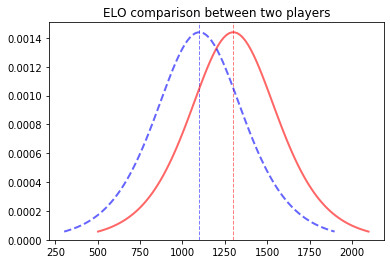

In [245]:
fig, ax = plt.subplots(1, 1)
ax.axvline(player1_rating, 0, 1, c='r', ls='--', lw=1, alpha=0.5)
ax.axvline(player2_rating, 0, 1, c='b', ls='--', lw=1, alpha=0.5)
ax.plot(x_elo, logistic.pdf(x_elo, scale=scale, loc=player1_rating),
       'r-', lw=2, alpha=0.6, label='logistic pdf')
ax.plot(x_elo_2, logistic.pdf(x_elo_2, scale=scale, loc=player2_rating),
       'b--', lw=2, alpha=0.6, label='logistic pdf 2')
ax.set_ylim(0,None)
ax.set_title('ELO comparison between two players')
plt.show()